# Семинар: Нейронные сети — Лёгкие задачи для самостоятельной работы

В этом ноутбуке собраны **5 относительно простых заданий** по материалу главы *Neural Networks* (Jurafsky & Martin, гл. 6).  
Они рассчитаны на выполнение прямо на семинаре и нацелены на закрепление базовых понятий:
* нейронный юнит и активационные функции;
* линейная комбинация входов;
* простейшие классификаторы;
* кросс-энтропийная потеря;
* базовая визуализация.


## Задача 1. Таблица значений активационных функций

Эта задача помогает почувствовать, как разные активационные функции преобразуют одно и то же скалярное значение `z`.

### Что нужно сделать

1. Реализовать три функции активации: `sigmoid`, `tanh`, `relu`.
2. Для набора значений `z` посчитать соответствующие значения трёх функций.
3. Сформировать таблицу, где по строкам идут значения `z`, а по столбцам — значения `sigmoid(z)`, `tanh(z)`, `relu(z)`.

### Подсказка

Сигмоида и tanh **сжимаются**, а ReLU **обнуляет все отрицательные значения** и оставляет положительные как есть.


In [ ]:
import numpy as np
import pandas as pd

# Набор значений z, которые нужно пропустить через активации
z_values = np.array([-3, -1, -0.5, 0, 0.5, 1, 3], dtype=float)

# TODO: реализуйте активационные функции
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def tanh(z):
    return np.tanh(z)

def relu(z):
    return np.maximum(0, z)

# TODO: сформируйте таблицу значений
rows = []
for z in z_values:
    row = {
        "z": z,
        "sigmoid(z)": sigmoid(z),  # замените на вызов sigmoid
        "tanh(z)": tanh(z),     # замените на вызов tanh
        "relu(z)": relu(z),     # замените на вызов relu
    }
    rows.append(row)

df = pd.DataFrame(rows)
df

,z,sigmoid(z),tanh(z),relu(z)
0,-3.0,0.047426,-0.995055,0.0
1,-1.0,0.268941,-0.761594,0.0
2,-0.5,0.377541,-0.462117,0.0
3,0.0,0.500000,0.000000,0.0
4,0.5,0.622459,0.462117,0.5
5,1.0,0.731059,0.761594,1.0
6,3.0,0.952574,0.995055,3.0


## Задача 2. Визуализация активационных функций

Теперь вы не только вычислите значения активаций, но и визуализируете их.  
Это помогает увидеть, где функции насыщаются и как меняются их производные (интуитивно).

### Что нужно сделать

1. Использовать те же функции `sigmoid`, `tanh`, `relu` из предыдущей задачи (можете продублировать код или импортировать ячейку).
2. Сгенерировать массив значений `z` из интервала, например `[-5, 5]` с небольшим шагом.
3. Построить три отдельные графика:
   * `z` по оси X, `sigmoid(z)` по оси Y;
   * `z` по оси X, `tanh(z)` по оси Y;
   * `z` по оси X, `relu(z)` по оси Y.

Используйте `matplotlib.pyplot` для построения графиков.


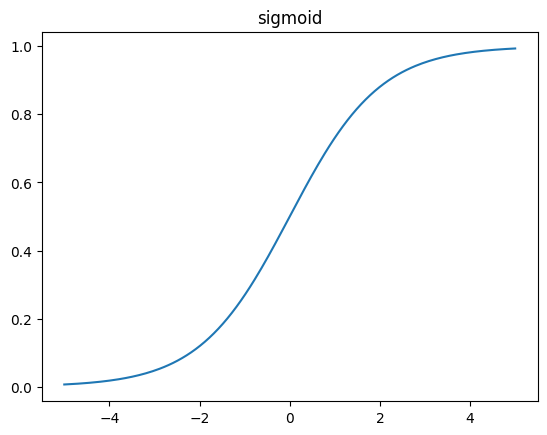

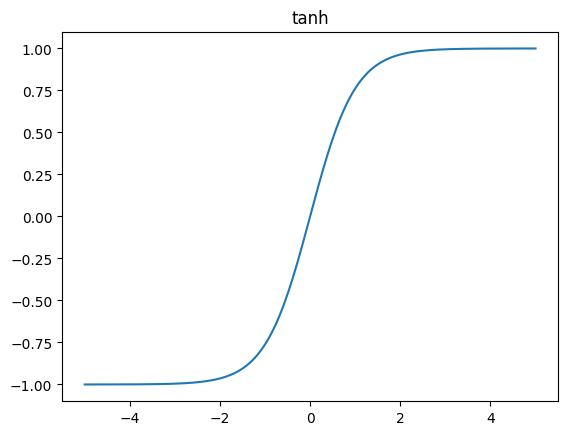

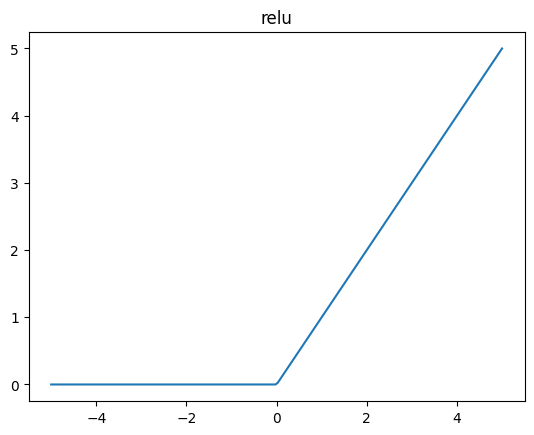

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Допустим, функции sigmoid, tanh, relu уже определены в предыдущей ячейке.
# Если нет — продублируйте их здесь.

# Пример: значения z от -5 до 5
z = np.linspace(-5, 5, 200)

# TODO: вычислите значения трёх активаций
s = sigmoid(z)
t = tanh(z)
r = relu(z)

# TODO: постройте три отдельных графика (по одному для каждой функции)
# Подсказка: plt.plot(z, s); plt.show()
plt.figure(1)
plt.plot(z, s)
plt.title("sigmoid")
plt.figure(2)
plt.plot(z, t)
plt.title("tanh")
plt.figure(3)
plt.plot(z, r)
plt.title("relu")
plt.show()


## Задача 3. Прямой проход одного нейронного юнита по набору примеров

В этой задаче мы работаем с **одним нейронным юнитом** (без скрытого слоя) и несколькими входными примерами.
Это по сути "микро-версия" логистической регрессии: линейная комбинация входа плюс нелинейность.

### Входные данные

У нас есть три входных вектора признаков (например, простые «игрушечные» признаки документа):

```python
X = np.array([
    [1.0, 0.0, 0.5],
    [0.0, 1.0, -0.5],
    [1.0, 1.0, 0.0],
])
```

и один набор параметров нейрона:

```python
w = np.array([0.3, -0.2, 0.5])
b = 0.1
```

### Что нужно сделать

1. Реализовать функцию `forward_neuron(X, w, b, activation)`, которая:
   * принимает матрицу входов `X` (по строкам — примеры), вектор весов `w`, скалярный сдвиг `b` и функцию активации;
   * возвращает вектор выходов для всех примеров.
2. В качестве активации использовать сигмоиду.
3. Посчитать выходы нейрона для всех трёх примеров.
4. Интерпретировать выходы как «вероятность класса 1» и посмотреть, какие примеры модель считает более «похожими» на класс 1.


In [ ]:
import numpy as np

# Входные данные
X = np.array([
    [1.0, 0.0, 0.5],
    [0.0, 1.0, -0.5],
    [1.0, 1.0, 0.0],
])

w = np.array([0.3, -0.2, 0.5])
b = 0.1

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def forward_neuron(X, w, b, activation):
    """
    X: матрица (N, d), по строкам — примеры
    w: вектор (d,)
    b: скаляр
    activation: функция, применяемая к линейной комбинации
    """
    # TODO: посчитать линейную комбинацию для всех примеров
    z = np.dot(X, w) + b
    # TODO: применить активацию
    a = sigmoid(z)
    # верните a
    return a

# TODO: вызовите forward_neuron для активации sigmoid и распечатайте результаты
forward_neuron(X, w, b, sigmoid)

array([0.65701046, 0.41338242, 0.549834  ])

## Задача 4. Простейший линейный классификатор на двумерных данных

В этой задаче мы посмотрим на **двумерные точки** и простой линейный классификатор вида:

\[
y = \sigma(w_1 x_1 + w_2 x_2 + b).
\]

Пусть у нас есть следующие точки двух классов (0 и 1):

```python
X = np.array([
    [0.0, 0.0],
    [0.0, 1.0],
    [1.0, 0.0],
    [1.0, 1.0],
])

y = np.array([0, 0, 0, 1])  # только точка (1,1) — класс 1
```

Мы хотим настроить параметры `w` и `b` **вручную** (а не обучать их), чтобы получить разумное разделение.

### Что нужно сделать

1. Реализовать сигмоидный нейрон `linear_classifier(X, w, b)`, который возвращает предсказания от 0 до 1.
2. Подставить несколько вариантов параметров (например, `w = [1, 1]`, `b = -1.5` и другие) и посмотреть, как меняются предсказания.
3. Для каждого варианта параметров округлить предсказания до 0/1 и сравнить с истинными метками.

Цель — наглядно увидеть, как весовые коэффициенты и порог (через `b`) задают разделяющую прямую.


In [ ]:
import numpy as np

X = np.array([
    [0.0, 0.0],
    [0.0, 1.0],
    [1.0, 0.0],
    [1.0, 1.0],
])

y = np.array([0, 0, 0, 1])

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def linear_classifier(X, w, b):
    """Сигмоидный линейный классификатор для набора точек X."""
    # TODO: вычислите линейную комбинацию и примените сигмоиду
    z = np.dot(X, w) + b
    y_pred = sigmoid(z)
    return y_pred

# Пример набора параметров для проверки
param_sets = [
    (np.array([1.0, 1.0]), -1.5),
    (np.array([2.0, 2.0]), -3.0),
    (np.array([1.0, -1.0]), 0.0),
]

for w, b in param_sets:
    print(f"Параметры: w={w}, b={b}")
    # TODO: получите предсказания y_hat = linear_classifier(...)
    y_hat = linear_classifier(X, w, b)
    # округлите до 0/1 и сравните с y
    pred = np.round(y_hat)
    # выведите результаты
    print(y_hat, pred)


Параметры: w=[1. 1.], b=-1.5
[0.18242552 0.37754067 0.37754067 0.62245933] [0. 0. 0. 1.]
Параметры: w=[2. 2.], b=-3.0
[0.04742587 0.26894142 0.26894142 0.73105858] [0. 0. 0. 1.]
Параметры: w=[ 1. -1.], b=0.0
[0.5        0.26894142 0.73105858 0.5       ] [0. 0. 1. 0.]


## Задача 5. Кросс-энтропийная потеря для одного примера

Кросс-энтропия — стандартная функция потерь для задач классификации.  
Для одного примера с истинной меткой в виде one-hot вектора \(y\) и предсказанным распределением \(\hat{y}\) она имеет вид:

\[
L(\hat{y}, y) = - \sum_k y_k \log(\hat{y}_k).
\]

Если истиной класс — \(c\), то \(y_c = 1\), остальные 0, и потери сводятся к:

\[
L = - \log(\hat{y}_c).
\]

### Что нужно сделать

1. Реализовать функцию `cross_entropy_one_example(y_pred, y_true_index)`, где:
   * `y_pred` — вектор предсказанных вероятностей (например, длины 3);
   * `y_true_index` — целочисленный индекс истинного класса.
2. Проверить её работу на следующих примерах:

```python
y_pred_1 = np.array([0.7, 0.2, 0.1])
y_true_1 = 0

y_pred_2 = np.array([0.1, 0.2, 0.7])
y_true_2 = 0
```

3. Сравнить потери в двух случаях и объяснить, почему во втором случае она больше (или меньше).

Обратите внимание: **чем ниже вероятность, назначенная истинному классу, тем выше значение потерь.**


In [ ]:
import numpy as np

def cross_entropy_one_example(y_pred, y_true_index):
    """
    y_pred: вектор предсказанных вероятностей (например, shape (K,))
    y_true_index: индекс истинного класса (int)
    """
    # TODO: реализовать формулу -log(y_pred[y_true_index])
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

    # Calculate the loss
    loss = -np.mean(y_true_index * np.log(y_pred) + (1 - y_true_index) * np.log(1 - y_pred))
    return loss

y_pred_1 = np.array([0.7, 0.2, 0.1])
y_true_1 = 0

y_pred_2 = np.array([0.1, 0.2, 0.7])
y_true_2 = 0

# TODO: посчитайте потери для обоих случаев и выведите их
print(cross_entropy_one_example(y_pred_1, y_true_1),
cross_entropy_one_example(y_pred_2, y_true_2))

0.5108256237659906 0.5108256237659906
